qwen2_ans_token_index
-1      969
 393     50
 448     50
 404     47
 402     46
       ... 
 834      1
 984      1
 160      1
 159      1
 182      1
Name: count, Length: 872, dtype: int64
Len = 12032 before filtering and 11063 after filtering
model_answer
1         1960
3         1678
4         1368
2         1253
7         1113
5          965
9          965
8          936
6          811
0            4
number       4
none         3
F            1
answer       1
f            1
Name: count, dtype: int64
model_answer
1    1960
3    1678
4    1368
2    1253
7    1113
5     965
9     965
8     936
6     811
Name: count, dtype: int64


,category,roc_auc,accuracy,gini,num_samples,model,metric
0,ALL,0.683447,0.441587,0.366894,10032,"Qwen 3B, chain-of-thought",model_answer_entropy
1,law,0.571810,0.241824,0.143619,1009,"Qwen 3B, chain-of-thought",model_answer_entropy
2,business,0.675270,0.502967,0.350539,674,"Qwen 3B, chain-of-thought",model_answer_entropy
3,psychology,0.740912,0.537949,0.481824,751,"Qwen 3B, chain-of-thought",model_answer_entropy
4,chemistry,0.636875,0.459596,0.273750,792,"Qwen 3B, chain-of-thought",model_answer_entropy
5,biology,0.787353,0.598820,0.574707,678,"Qwen 3B, chain-of-thought",model_answer_entropy
6,history,0.619288,0.377778,0.238577,360,"Qwen 3B, chain-of-thought",model_answer_entropy
7,other,0.652076,0.404157,0.304153,866,"Qwen 3B, chain-of-thought",model_answer_entropy
8,physics,0.677809,0.448032,0.355617,991,"Qwen 3B, chain-of-thought",model_answer_entropy
9,computer science,0.677373,0.407713,0.354745,363,"Qwen 3B, chain-of-thought",model_answer_entropy


,category,roc_auc,accuracy,gini,num_samples,model,metric
0,ALL,0.611236,0.441587,0.222472,10032,"Qwen 3B, chain-of-thought",masj_edu_level_norm


,category,roc_auc,accuracy,gini,num_samples,model,metric
0,ALL,0.553857,0.441587,0.107714,10032,"Qwen 3B, chain-of-thought",masj_num_reasoning_steps_norm


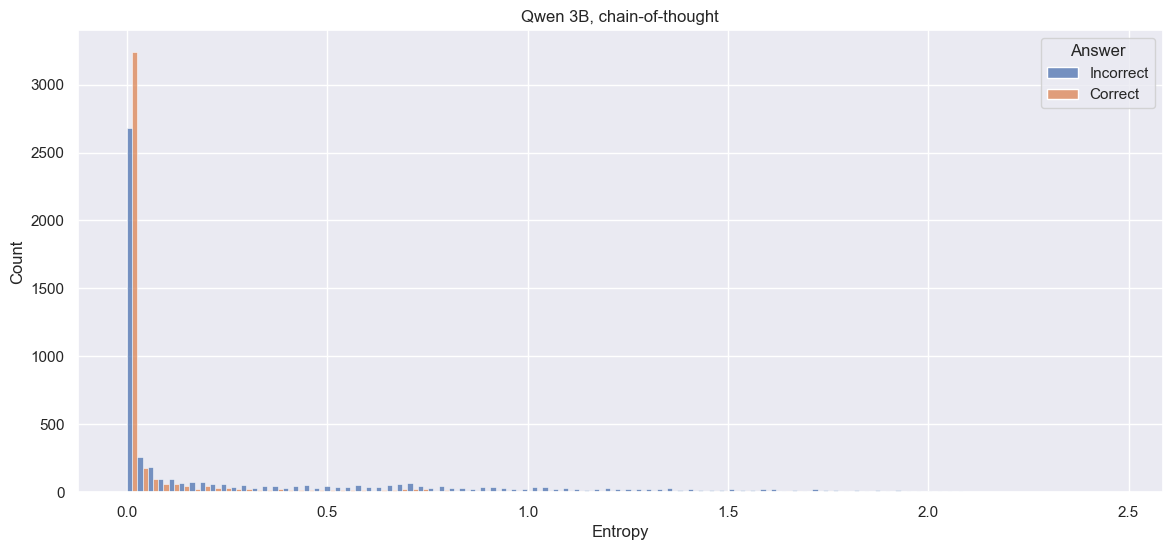

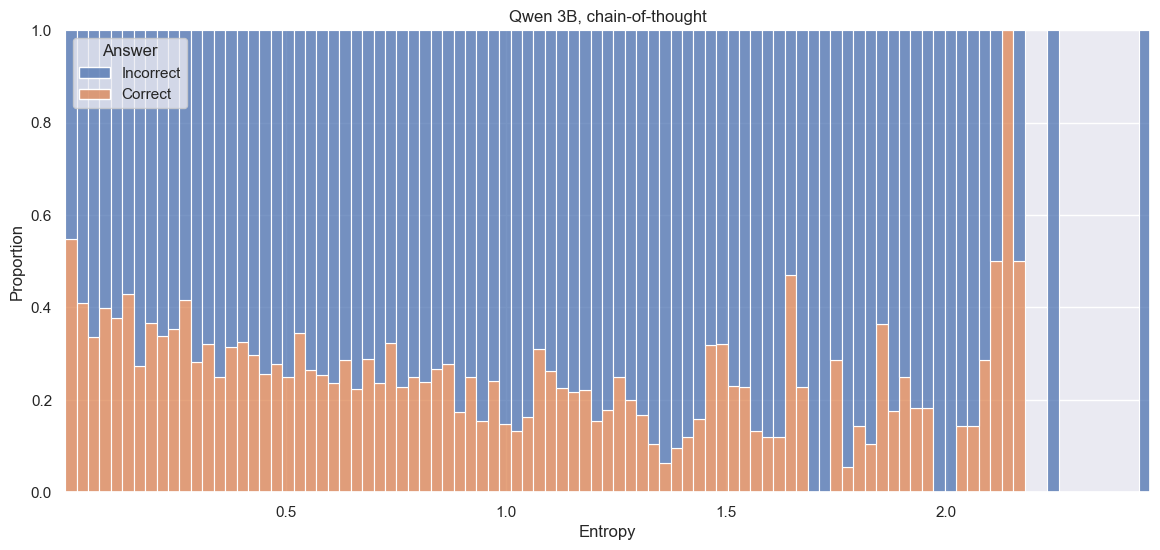

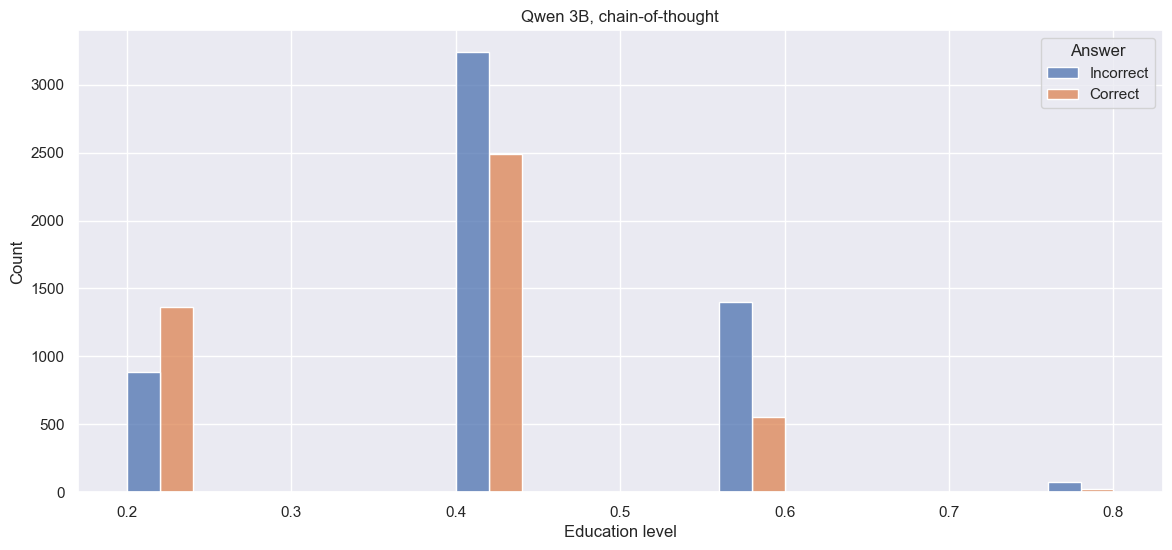

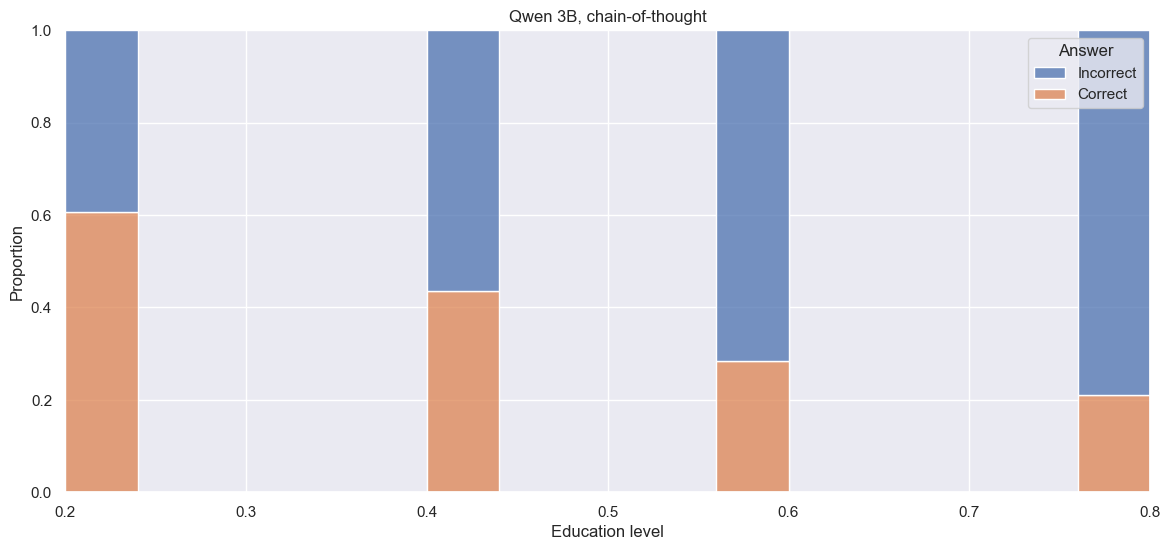

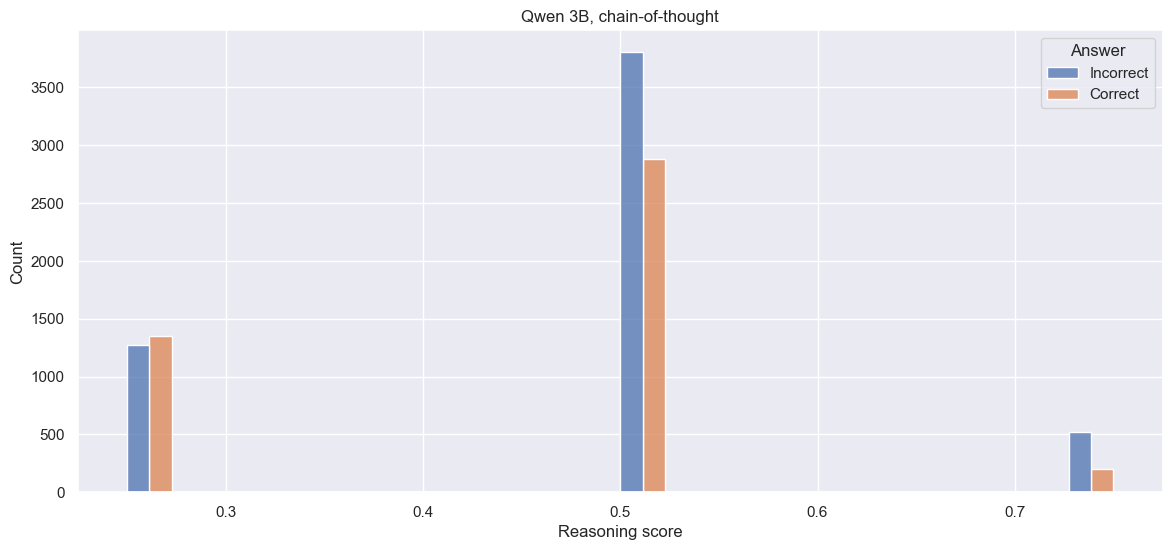

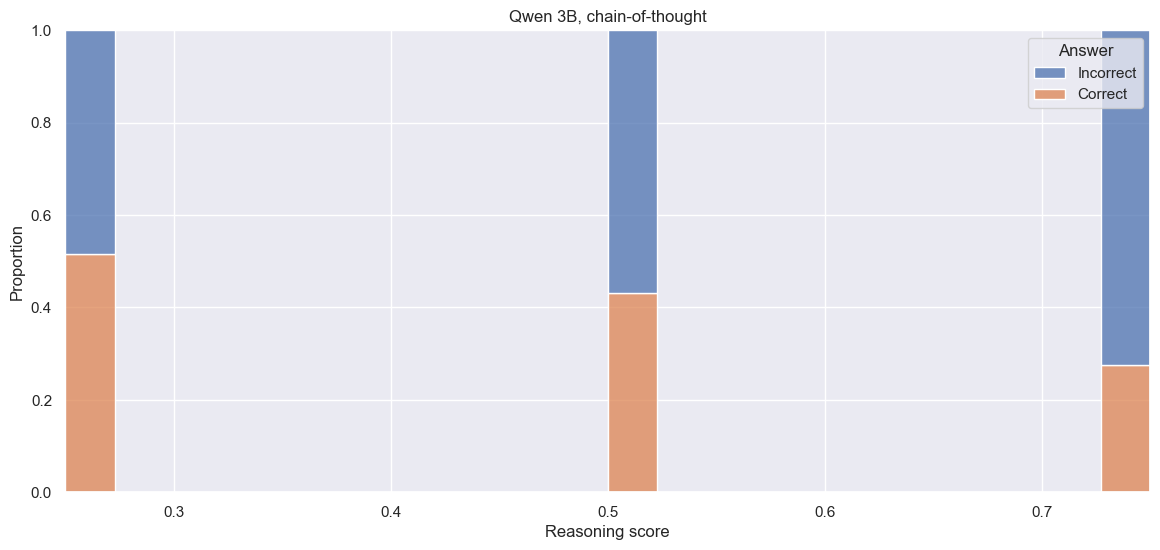

In [1]:
import seaborn as sns

from reasoning_fine_tune.analysis.standard_analysis import standard_analysis_cot_response

sns.set_theme(palette="deep")

standard_analysis_cot_response(
    "../../../data/out/cot_entropy/mmlu_qwen_3b_v2.parquet",
    "qwen2_ans_token_index",
    "qwen2_every_token_info",
    "qwen2_entropies",
    "qwen2_ans_correct",
    "Qwen/Qwen2.5-3B-Instruct",
    "Qwen 3B, chain-of-thought",
)